In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import os
import mne
import pickle
import itertools

# from numba import jit, cuda
import json

import pac

import Get_global_local_feature

### Apply some initial setting for the future blocks

In [21]:
with open('config.json') as f:
    config = json.load(f)
    
base_path = config['BASE_PATH']
ds_path = os.path.join(base_path, 'ds003490-download')

gamma = [33, 36]
beta = [5, 8]
suffix = '_33_36_double_2run'

groups = ['PD OFF','PD ON','CTL']

selected_events = ['S200', 'S201', 'S202']
selected_channels = ['F3', 'F4', 'FC3', 'FC4', 'Fz', 'Pz']

selected_channels_pairs = [
    ('Fz', 'FC3'), ('Fz', 'FC4'),
    ('Pz', 'FC3'), ('Pz', 'FC4'),
    ('Fz', 'F3'), ('Fz', 'F4'),
    ('Pz', 'F3'), ('Pz', 'F4'),]
mvl_cross_time_mmap_path = os.path.join(
ds_path, f'MVL_cross_time_{suffix}.mmap')

# The the third axis in mvl_cross_time and mvl_2ds
#['S200_i', 'S200_o', 'S201_i', 'S201_o', 'S202_i', 'S202_o']
# x axis ticks formater
def format_func_x(value, tick_number):
    # find number of multiples of pi/2
    # if tick_number%2 == 1:
    #     return f'({1+4*(value)},{1+4*(value+1)-1})'
    if tick_number%2 == 1:
        return f'{-200+200*(tick_number-1),-200+200*(tick_number)}'
# y axis ticks formater
def format_func_y(value, tick_number):
    # find number of multiples of pi/2
    if tick_number%2 == 1:
        return f'({10+4*(value)},{10+4*(value+1)-1})'


### Load PAC runs in two blocks


In [9]:

mvl_cross_time = np.memmap(mvl_cross_time_mmap_path, dtype=float, mode='r+',
                           shape=(3,  # pd_drug_type
                                  25,  # Subjects
                                  6,  # event_types
                                  len(selected_channels),  # Selected Channels
                                  len(selected_channels),  # Selected Channels
                                  gamma[1] - gamma[0] + 1,  # High Freq
                                  beta[1] - beta[0] + 1,  # Low Freq
                                  6
                                  ))




(3, 25, 6, 6, 6, 4, 4, 6)
4.092524940020433


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [11]:

print(mvl_cross_time.shape)

print(np.max(mvl_cross_time))

print(mvl_cross_time[0,0,0,0,0,0,0,0])

(3, 25, 6, 6, 6, 4, 4, 6)
4.092524940020433
0.09113787069325087


### Analysis of the first block

#### Plot dynamic of cross time of Fz

In [ ]:
feature_h = 8
feature_l = 1
# ['FC3','FC4','AF3','AF4','F3','F4','Fz','Pz','Cz','FCz']
# list_index = [38, 57, 33, 61, 2, 29,1,12,23,39]

# ['Fz','Pz','Cz','FCz']
list_index = [(0,4), (1,4), (2,4), (3,4)]
for ch in list_index:
    fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15, 15))
    for i in np.arange(3):
        for j in np.arange(3): 
            # mean_plot = np.mean(PAC_feature_time_window,axis=0)
            mvl_cross_time_feature_PAC = np.mean(mvl_cross_time[i,:,2*j,ch[0],ch[1],:,:,:],axis=(1,2))
            mean_plot = np.mean(mvl_cross_time_feature_PAC[:,:],axis=0)
            std_plot = np.std(mvl_cross_time_feature_PAC[:,:],axis=0)

            axs[i,j].plot(mean_plot,color='b',label='mean')
            axs[i,j].plot(mean_plot+0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean+0.5std')
            axs[i,j].plot(mean_plot-0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean-0.5std')
            axs[i,j].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))
            

    for i in np.arange(3):
        axs[i, 0].set_ylabel(f'{groups[i]}')
        axs[0, i].set_title(selected_events[i])

    handles, labels = axs[2,2].get_legend_handles_labels()
    fig.legend(handles, ['mean','mean+0.5std','mean-0.5std'], loc='right')
    plt.suptitle(f'{selected_channels[ch[0]]}-{selected_channels[ch[1]]} first block',y=0.93)
    # Path_save_fig = f'/mnt/D/Mastersharif/MasterProject/Working_with_kiani/articles/Result_on_articles/time_window_results/PAC_dynamic_ch_{channels_name[ch]}_fh{feature_h}_fl{feature_l}.png' 
    # plt.savefig(Path_save_fig) 



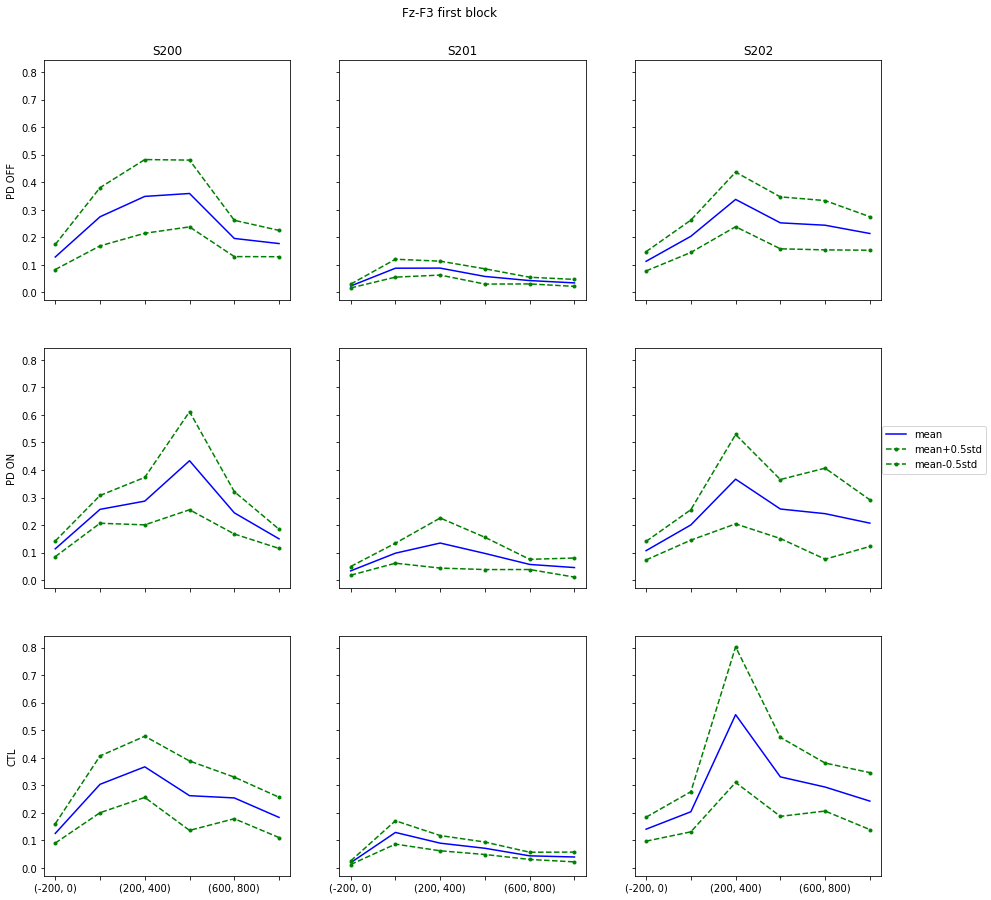

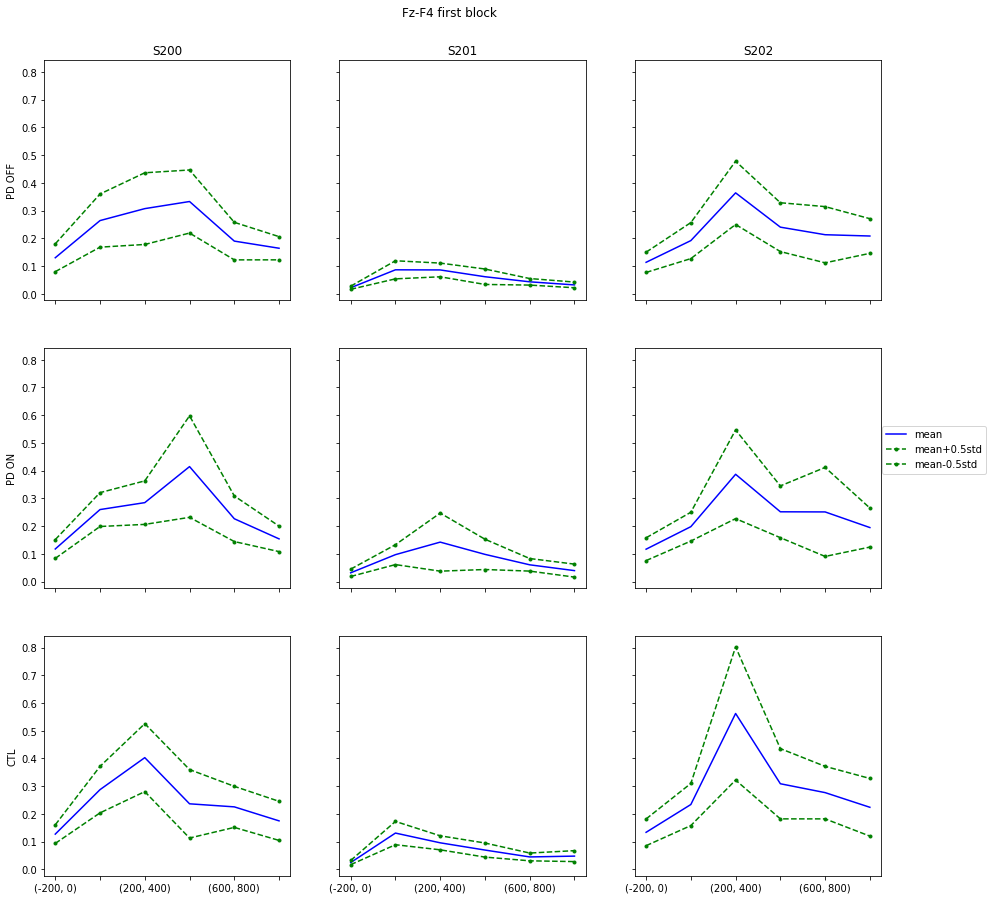

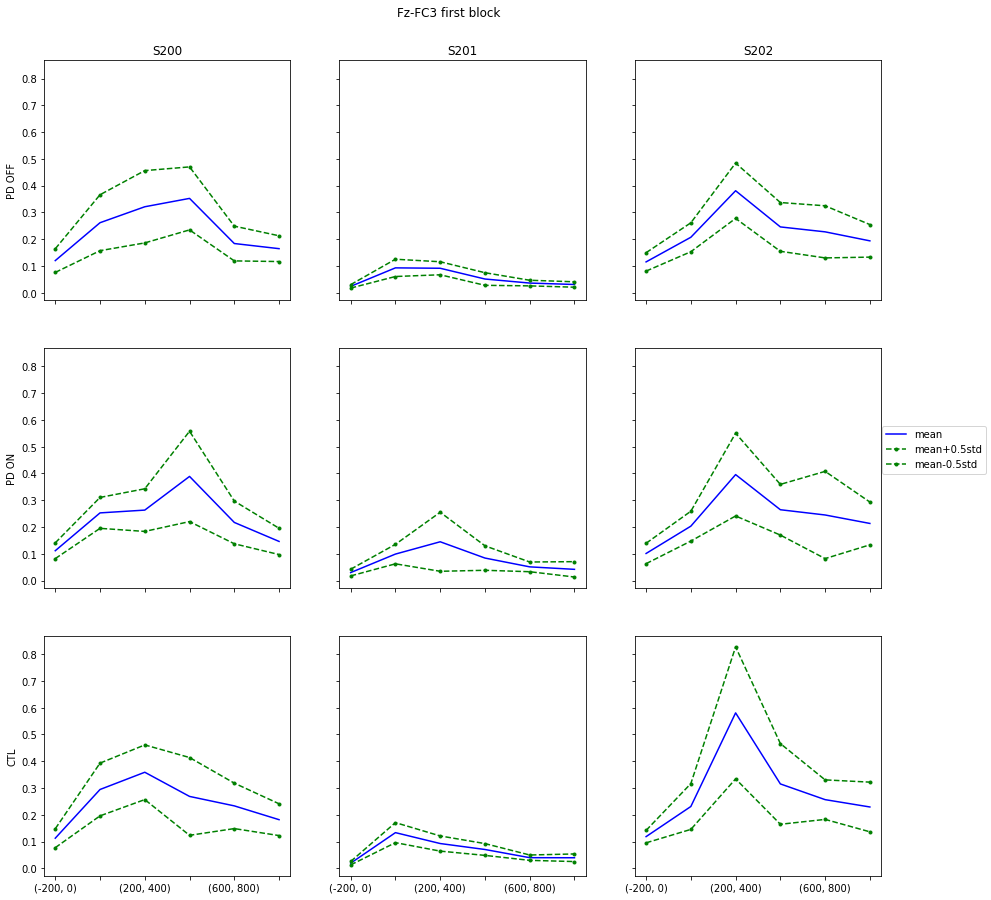

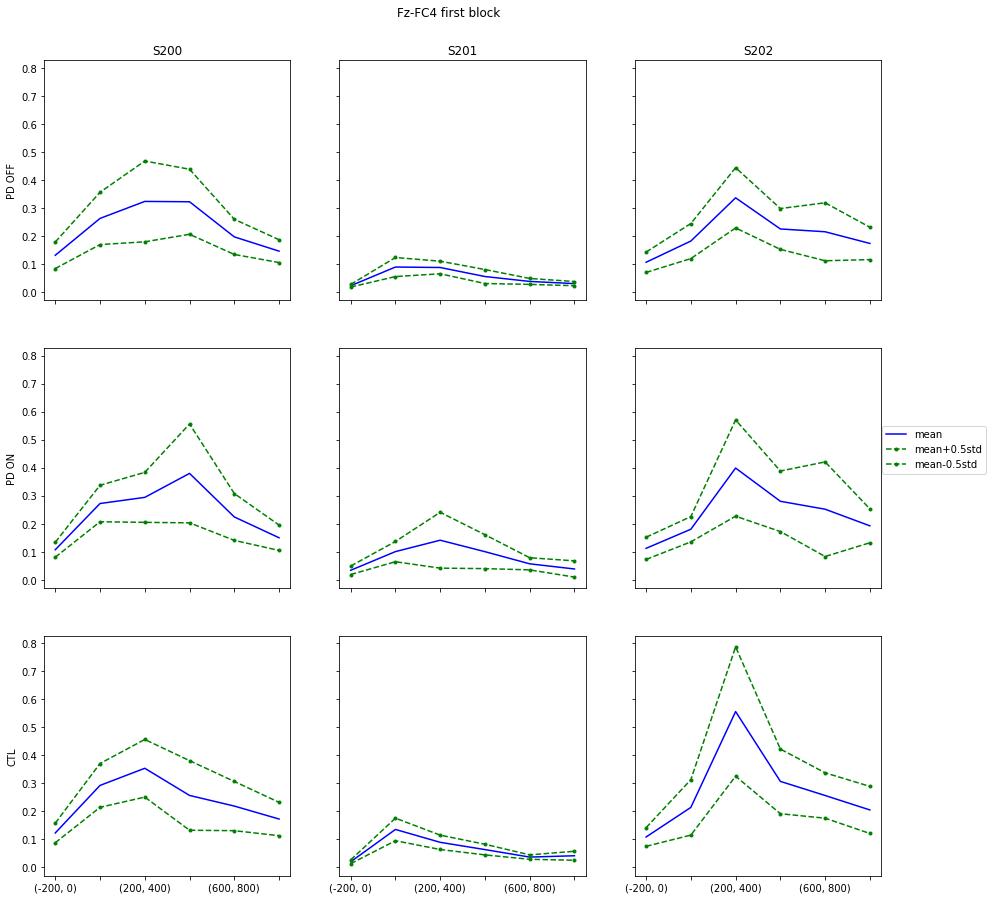

In [40]:
feature_h = 8
feature_l = 1
# ['FC3','FC4','AF3','AF4','F3','F4','Fz','Pz','Cz','FCz']
# list_index = [38, 57, 33, 61, 2, 29,1,12,23,39]

# ['Fz','Pz','Cz','FCz']
list_index = [(0,4), (1,4), (2,4), (3,4)]
for ch in list_index:
    fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15, 15))
    for i in np.arange(3):
        for j in np.arange(3): 
            # mean_plot = np.mean(PAC_feature_time_window,axis=0)
            mvl_cross_time_feature_PAC = np.mean(mvl_cross_time[i,:,2*j,ch[1],ch[0],:,:,:],axis=(1,2))
            mean_plot = np.mean(mvl_cross_time_feature_PAC[:,:],axis=0)
            std_plot = np.std(mvl_cross_time_feature_PAC[:,:],axis=0)

            axs[i,j].plot(mean_plot,color='b',label='mean')
            axs[i,j].plot(mean_plot+0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean+0.5std')
            axs[i,j].plot(mean_plot-0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean-0.5std')
            axs[i,j].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))
            

    for i in np.arange(3):
        axs[i, 0].set_ylabel(f'{groups[i]}')
        axs[0, i].set_title(selected_events[i])

    handles, labels = axs[2,2].get_legend_handles_labels()
    fig.legend(handles, ['mean','mean+0.5std','mean-0.5std'], loc='right')
    plt.suptitle(f'{selected_channels[ch[1]]}-{selected_channels[ch[0]]} first block',y=0.93)
    # Path_save_fig = f'/mnt/D/Mastersharif/MasterProject/Working_with_kiani/articles/Result_on_articles/time_window_results/PAC_dynamic_ch_{channels_name[ch]}_fh{feature_h}_fl{feature_l}.png' 
    # plt.savefig(Path_save_fig) 



#### Plot dynamic of cross time of Pz

In [ ]:
feature_h = 8
feature_l = 1
# ['FC3','FC5','AF3','AF5','F3','F5','Fz','Pz','Cz','FCz']
# list_index = [38, 57, 33, 61, 2, 29,1,12,23,39]

# ['Fz','Pz','Cz','FCz']
list_index = [(0,5), (1,5), (2,5), (3,5)]
for ch in list_index:
    fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15, 15))
    for i in np.arange(3):
        for j in np.arange(3): 
            # mean_plot = np.mean(PAC_feature_time_window,axis=0)
            mvl_cross_time_feature_PAC = np.mean(mvl_cross_time[i,:,2*j,ch[0],ch[1],:,:,:],axis=(1,2))
            mean_plot = np.mean(mvl_cross_time_feature_PAC[:,:],axis=0)
            std_plot = np.std(mvl_cross_time_feature_PAC[:,:],axis=0)

            axs[i,j].plot(mean_plot,color='b',label='mean')
            axs[i,j].plot(mean_plot+0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean+0.5std')
            axs[i,j].plot(mean_plot-0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean-0.5std')
            axs[i,j].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))
            

    for i in np.arange(3):
        axs[i, 0].set_ylabel(f'{groups[i]}')
        axs[0, i].set_title(selected_events[i])

    handles, labels = axs[2,2].get_legend_handles_labels()
    fig.legend(handles, ['mean','mean+0.5std','mean-0.5std'], loc='right')
    plt.suptitle(f'{selected_channels[ch[0]]}-{selected_channels[ch[1]]} first block',y=0.93)
    # Path_save_fig = f'/mnt/D/Mastersharif/MasterProject/Working_with_kiani/articles/Result_on_articles/time_window_results/PAC_dynamic_ch_{channels_name[ch]}_fh{feature_h}_fl{feature_l}.png' 
    # plt.savefig(Path_save_fig) 



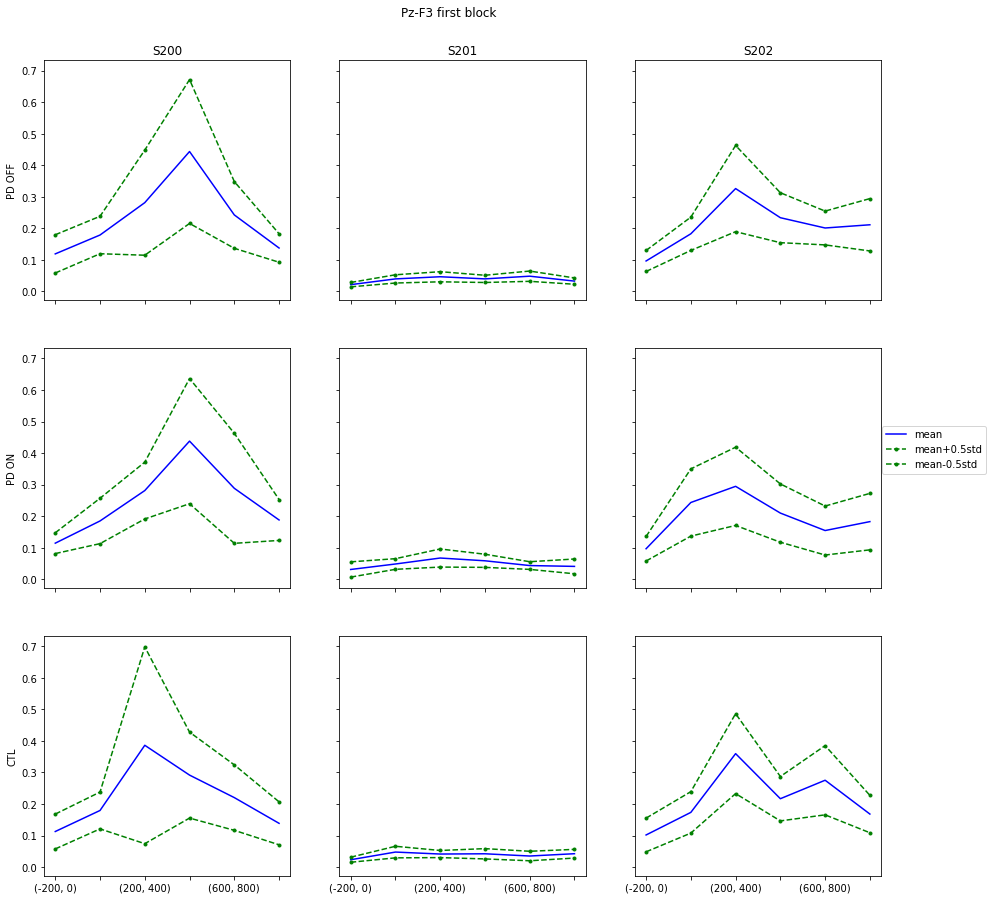

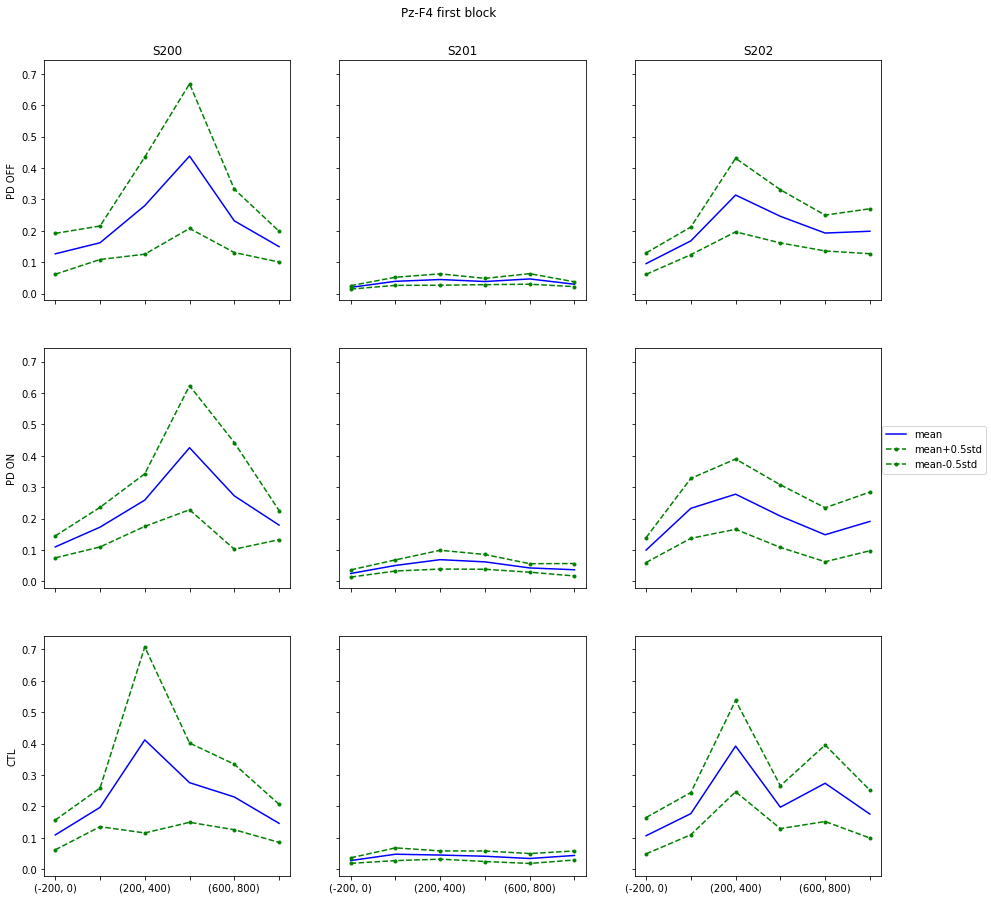

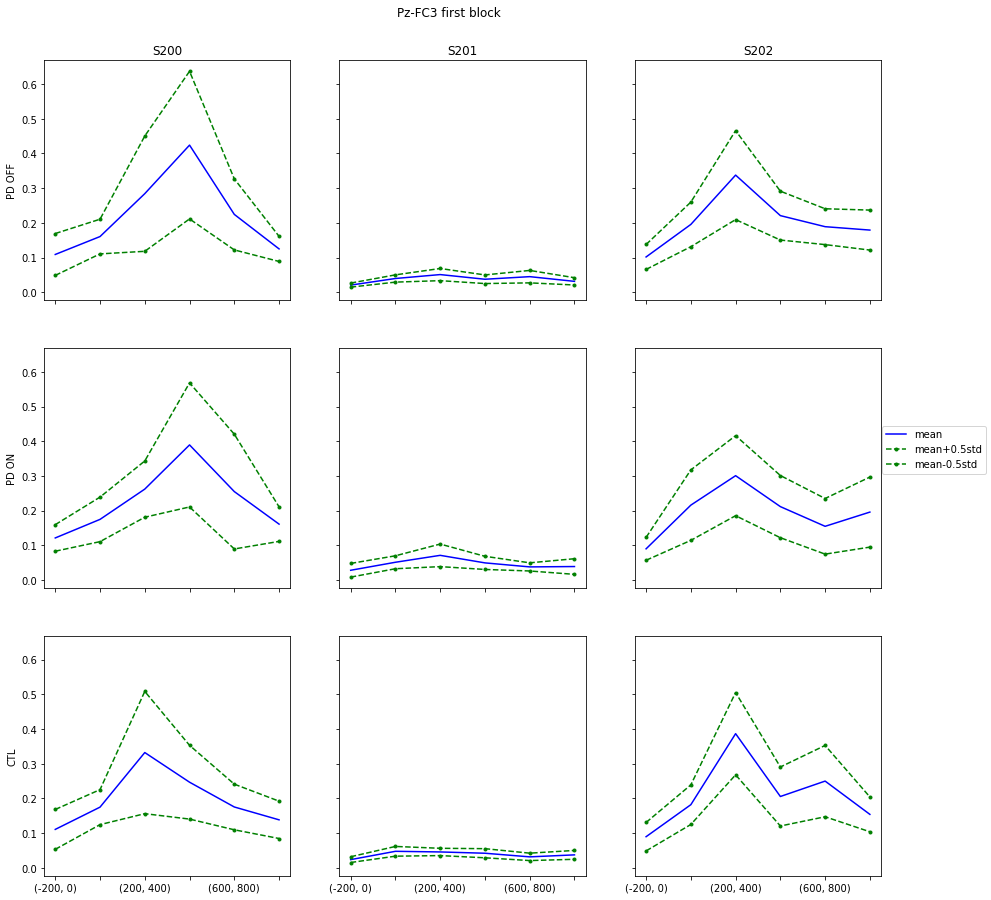

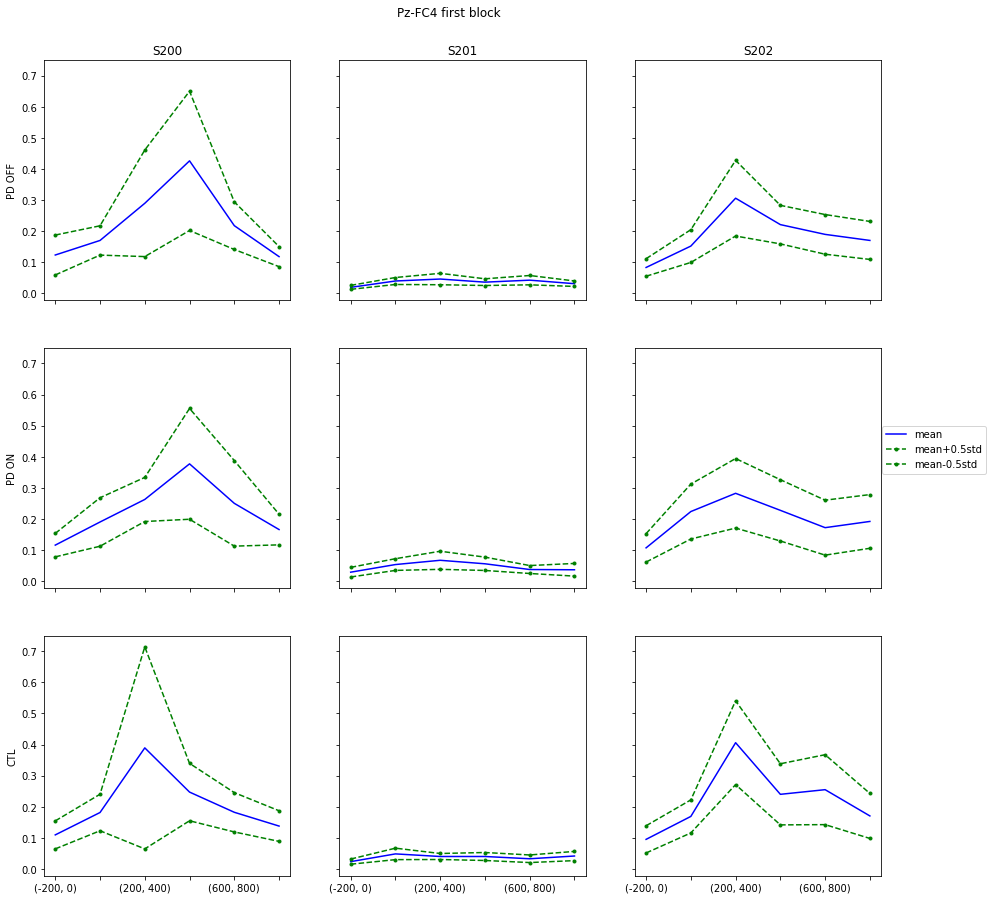

In [41]:
feature_h = 8
feature_l = 1
# ['FC3','FC5','AF3','AF5','F3','F5','Fz','Pz','Cz','FCz']
# list_index = [38, 57, 33, 61, 2, 29,1,12,23,39]

# ['Fz','Pz','Cz','FCz']
list_index = [(0,5), (1,5), (2,5), (3,5)]
for ch in list_index:
    fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15, 15))
    for i in np.arange(3):
        for j in np.arange(3): 
            # mean_plot = np.mean(PAC_feature_time_window,axis=0)
            mvl_cross_time_feature_PAC = np.mean(mvl_cross_time[i,:,2*j,ch[1],ch[0],:,:,:],axis=(1,2))
            mean_plot = np.mean(mvl_cross_time_feature_PAC[:,:],axis=0)
            std_plot = np.std(mvl_cross_time_feature_PAC[:,:],axis=0)

            axs[i,j].plot(mean_plot,color='b',label='mean')
            axs[i,j].plot(mean_plot+0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean+0.5std')
            axs[i,j].plot(mean_plot-0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean-0.5std')
            axs[i,j].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))
            

    for i in np.arange(3):
        axs[i, 0].set_ylabel(f'{groups[i]}')
        axs[0, i].set_title(selected_events[i])

    handles, labels = axs[2,2].get_legend_handles_labels()
    fig.legend(handles, ['mean','mean+0.5std','mean-0.5std'], loc='right')
    plt.suptitle(f'{selected_channels[ch[1]]}-{selected_channels[ch[0]]} first block',y=0.93)
    # Path_save_fig = f'/mnt/D/Mastersharif/MasterProject/Working_with_kiani/articles/Result_on_articles/time_window_results/PAC_dynamic_ch_{channels_name[ch]}_fh{feature_h}_fl{feature_l}.png' 
    # plt.savefig(Path_save_fig) 



### Analysis of the second block

##### Plot dynamic of cross time of Fz

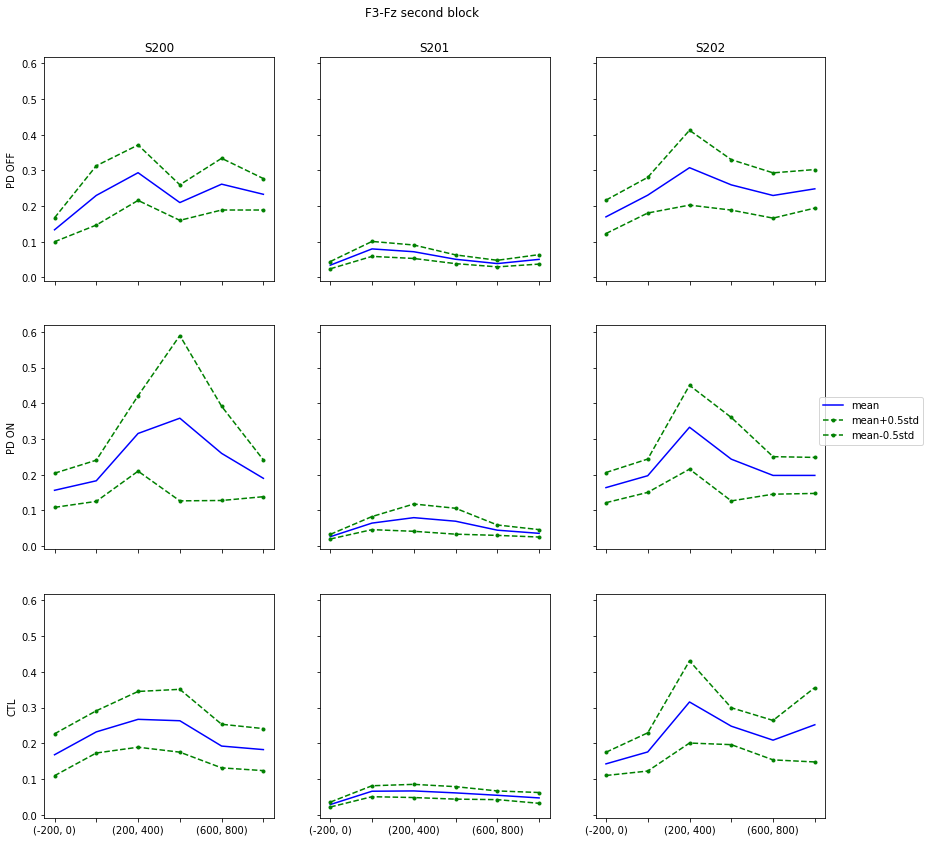

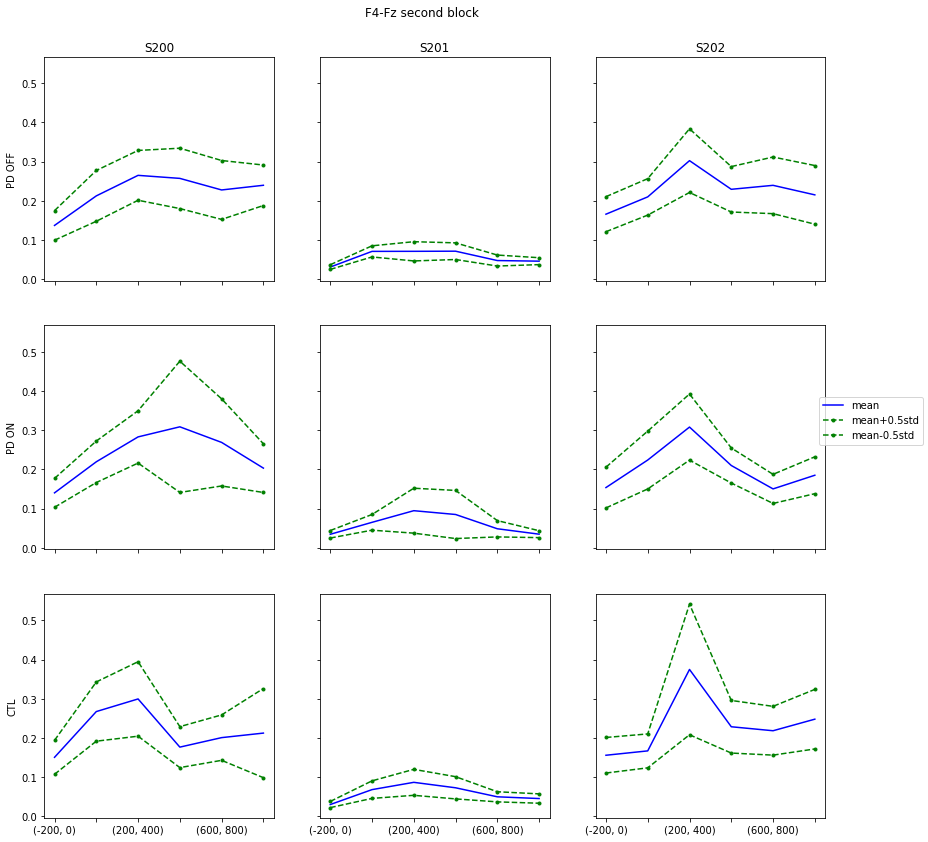

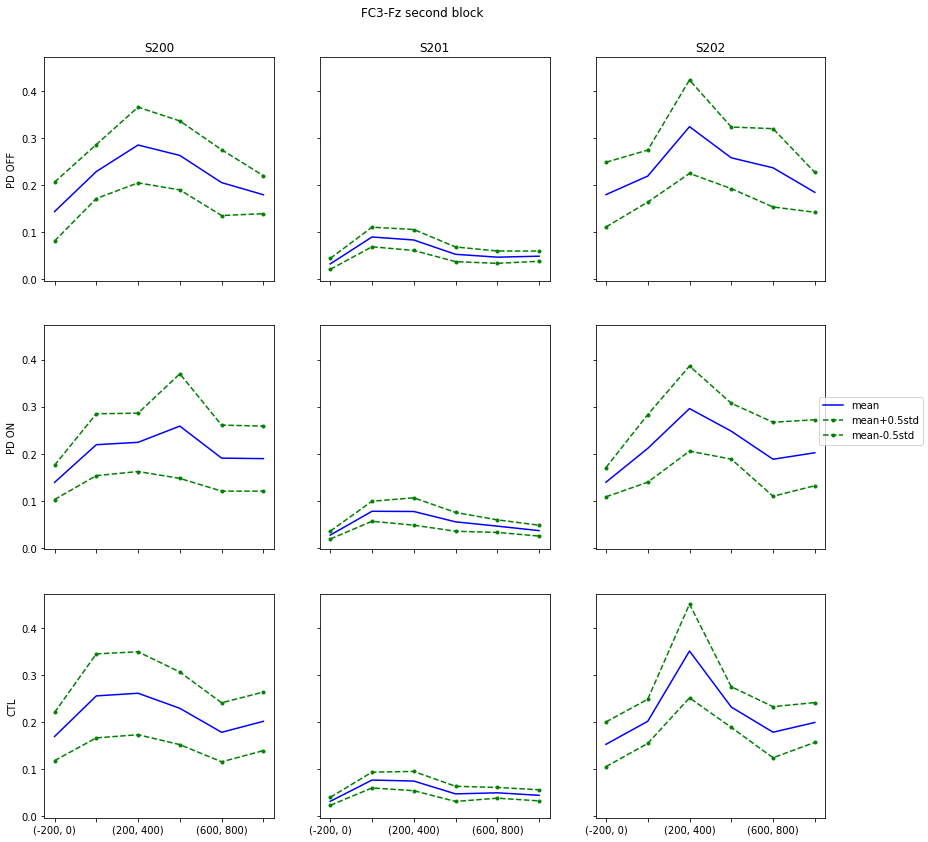

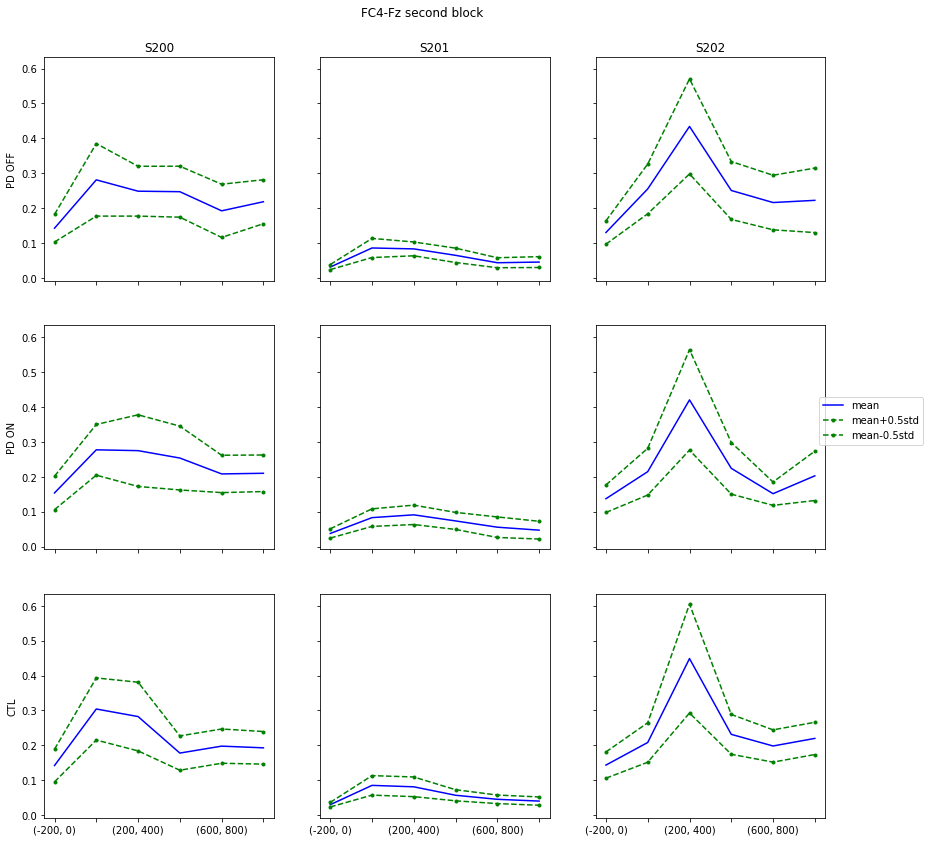

In [52]:
feature_h = 8
feature_l = 1
# ['FC3','FC4','AF3','AF4','F3','F4','Fz','Pz','Cz','FCz']
# list_index = [38, 47, 33, 61, 2, 29,1,12,23,39]

# ['Fz','Pz','Cz','FCz']
list_index = [(0,4), (1,4), (2,4), (3,4)]
for ch in list_index:
    fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(14, 14))
    for i in np.arange(3):
        for j in np.arange(3): 
            # mean_plot = np.mean(PAC_feature_time_window,axis=0)
            mvl_cross_time_feature_PAC = np.mean(mvl_cross_time[i,:,2*j+1,ch[0],ch[1],:,:,:],axis=(1,2))
            mean_plot = np.mean(mvl_cross_time_feature_PAC[:,:],axis=0)
            std_plot = np.std(mvl_cross_time_feature_PAC[:,:],axis=0)

            axs[i,j].plot(mean_plot,color='b',label='mean')
            axs[i,j].plot(mean_plot+0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean+0.5std')
            axs[i,j].plot(mean_plot-0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean-0.5std')
            axs[i,j].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))
            

    for i in np.arange(3):
        axs[i, 0].set_ylabel(f'{groups[i]}')
        axs[0, i].set_title(selected_events[i])

    handles, labels = axs[2,2].get_legend_handles_labels()
    fig.legend(handles, ['mean','mean+0.5std','mean-0.5std'], loc='right')
    plt.suptitle(f'{selected_channels[ch[0]]}-{selected_channels[ch[1]]} second block',y=0.93)
    # Path_save_fig = f'/mnt/D/Mastersharif/MasterProject/Working_with_kiani/articles/Result_on_articles/time_window_results/PAC_dynamic_ch_{channels_name[ch]}_fh{feature_h}_fl{feature_l}.png' 
    # plt.savefig(Path_save_fig) 



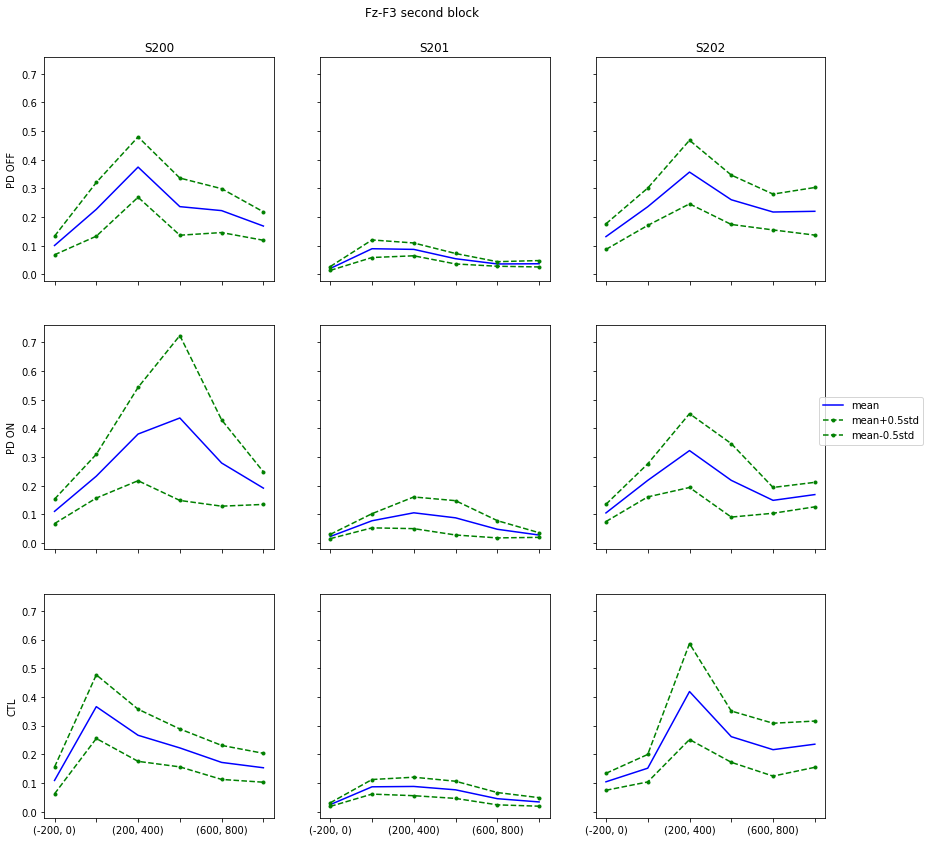

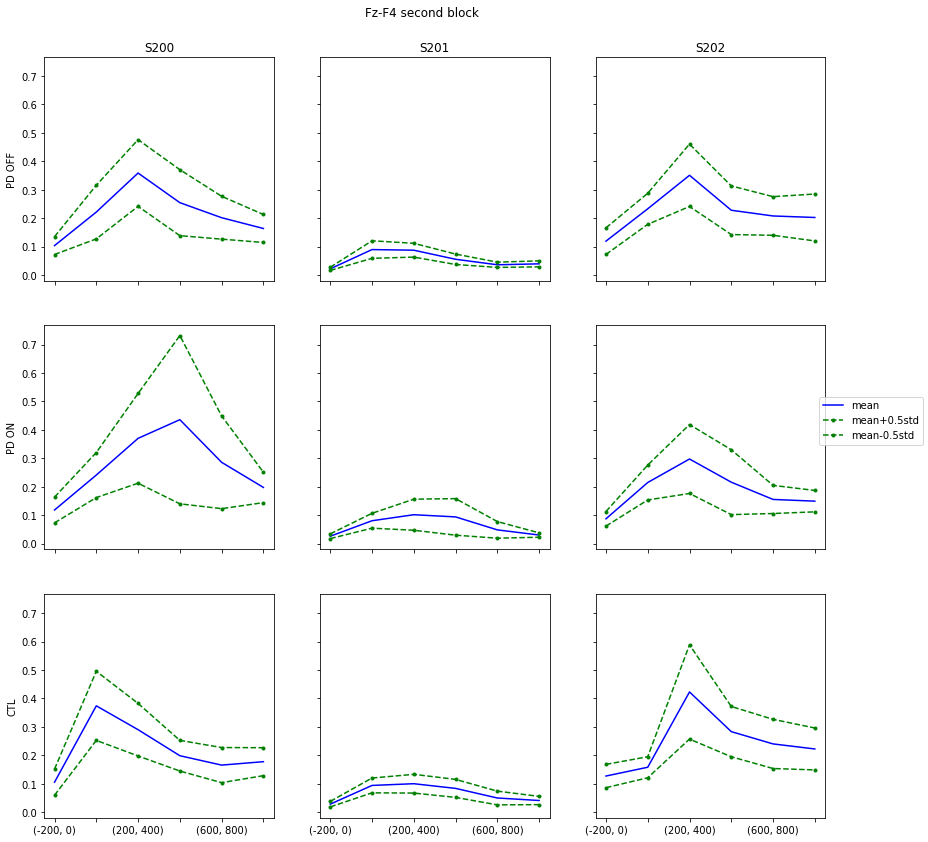

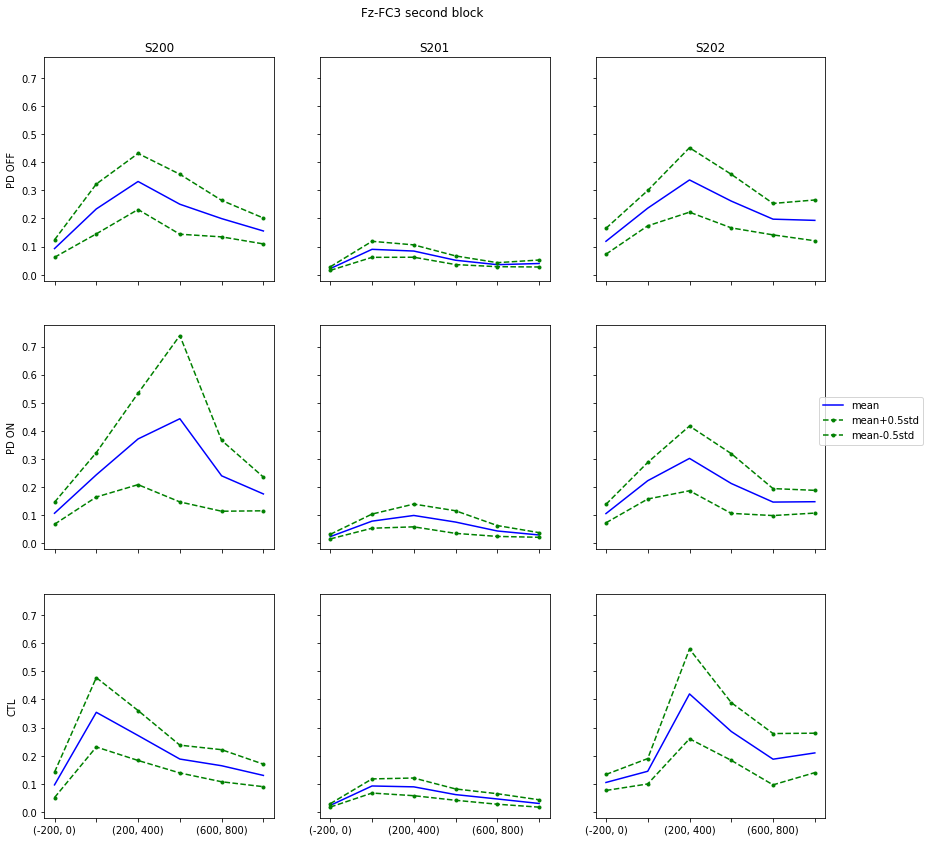

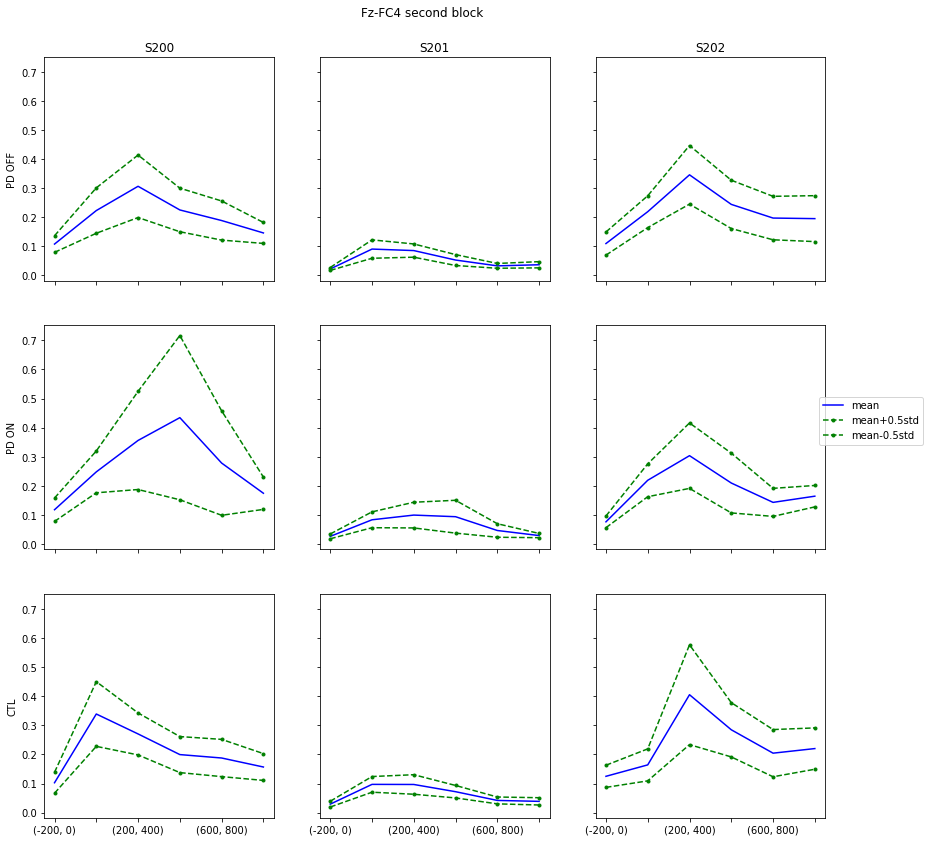

In [51]:
feature_h = 8
feature_l = 1
# ['FC3','FC4','AF3','AF4','F3','F4','Fz','Pz','Cz','FCz']
# list_index = [38, 47, 33, 61, 2, 29,1,12,23,39]

# ['Fz','Pz','Cz','FCz']
list_index = [(0,4), (1,4), (2,4), (3,4)]
for ch in list_index:
    fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(14, 14))
    for i in np.arange(3):
        for j in np.arange(3): 
            # mean_plot = np.mean(PAC_feature_time_window,axis=0)
            mvl_cross_time_feature_PAC = np.mean(mvl_cross_time[i,:,2*j+1,ch[1],ch[0],:,:,:],axis=(1,2))
            mean_plot = np.mean(mvl_cross_time_feature_PAC[:,:],axis=0)
            std_plot = np.std(mvl_cross_time_feature_PAC[:,:],axis=0)

            axs[i,j].plot(mean_plot,color='b',label='mean')
            axs[i,j].plot(mean_plot+0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean+0.5std')
            axs[i,j].plot(mean_plot-0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean-0.5std')
            axs[i,j].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))
            

    for i in np.arange(3):
        axs[i, 0].set_ylabel(f'{groups[i]}')
        axs[0, i].set_title(selected_events[i])

    handles, labels = axs[2,2].get_legend_handles_labels()
    fig.legend(handles, ['mean','mean+0.5std','mean-0.5std'], loc='right')
    plt.suptitle(f'{selected_channels[ch[1]]}-{selected_channels[ch[0]]} second block',y=0.93)
    # Path_save_fig = f'/mnt/D/Mastersharif/MasterProject/Working_with_kiani/articles/Result_on_articles/time_window_results/PAC_dynamic_ch_{channels_name[ch]}_fh{feature_h}_fl{feature_l}.png' 
    # plt.savefig(Path_save_fig) 



#### Plot dynamic of cross time of Pz

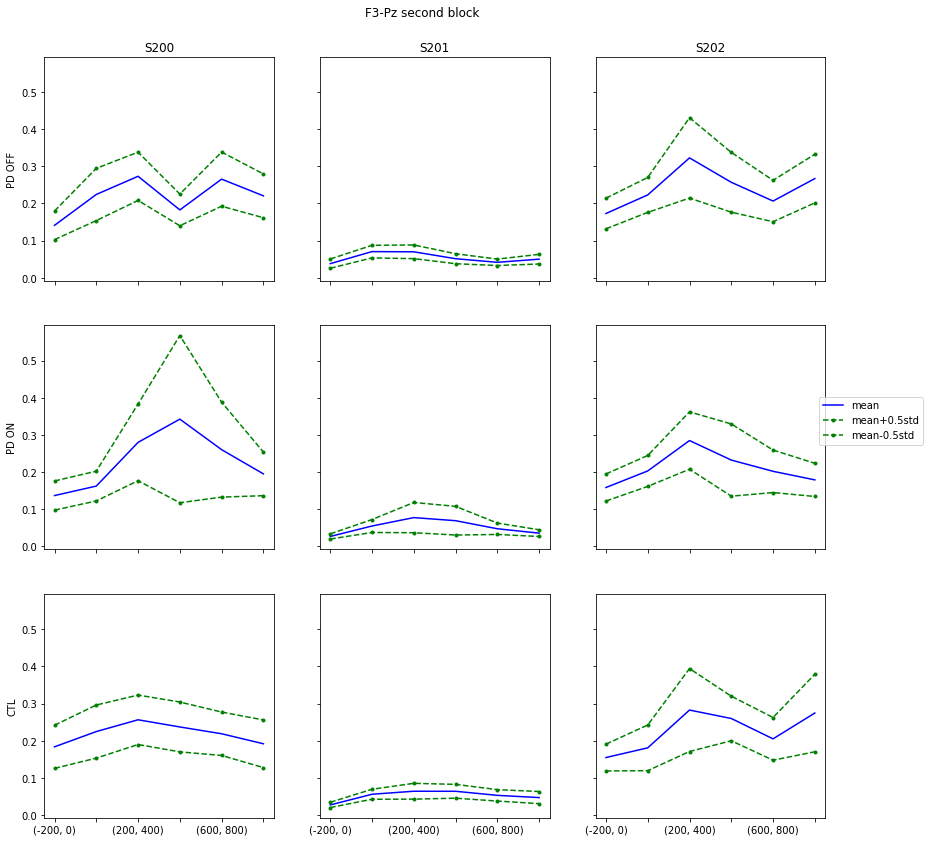

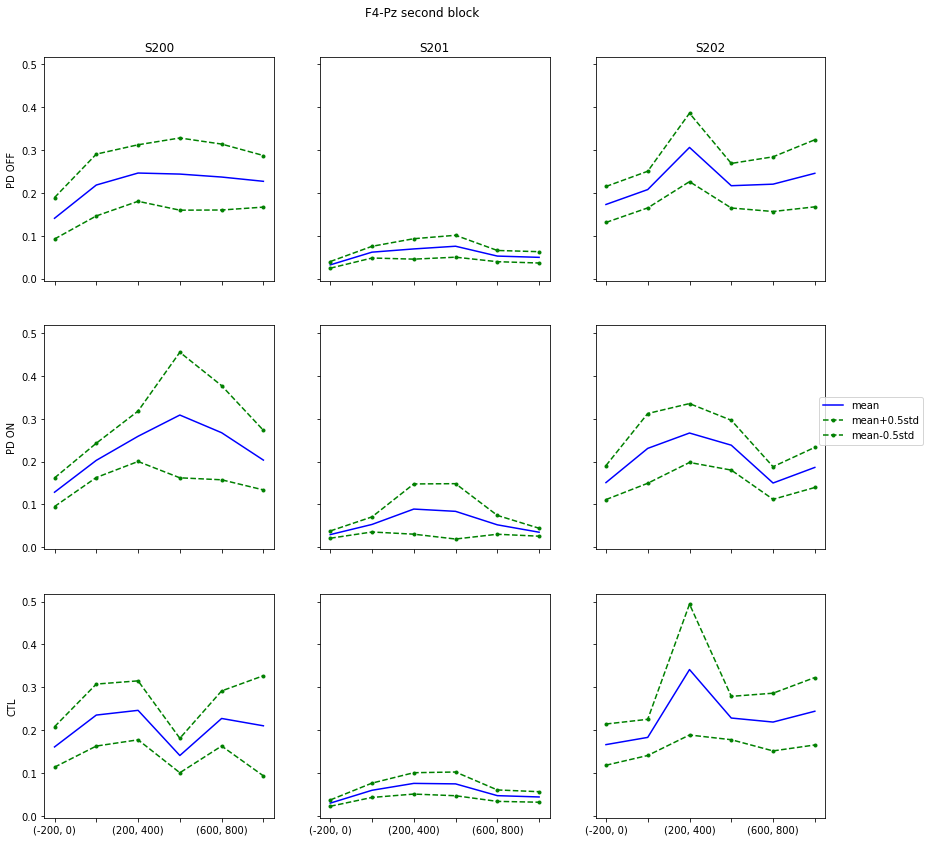

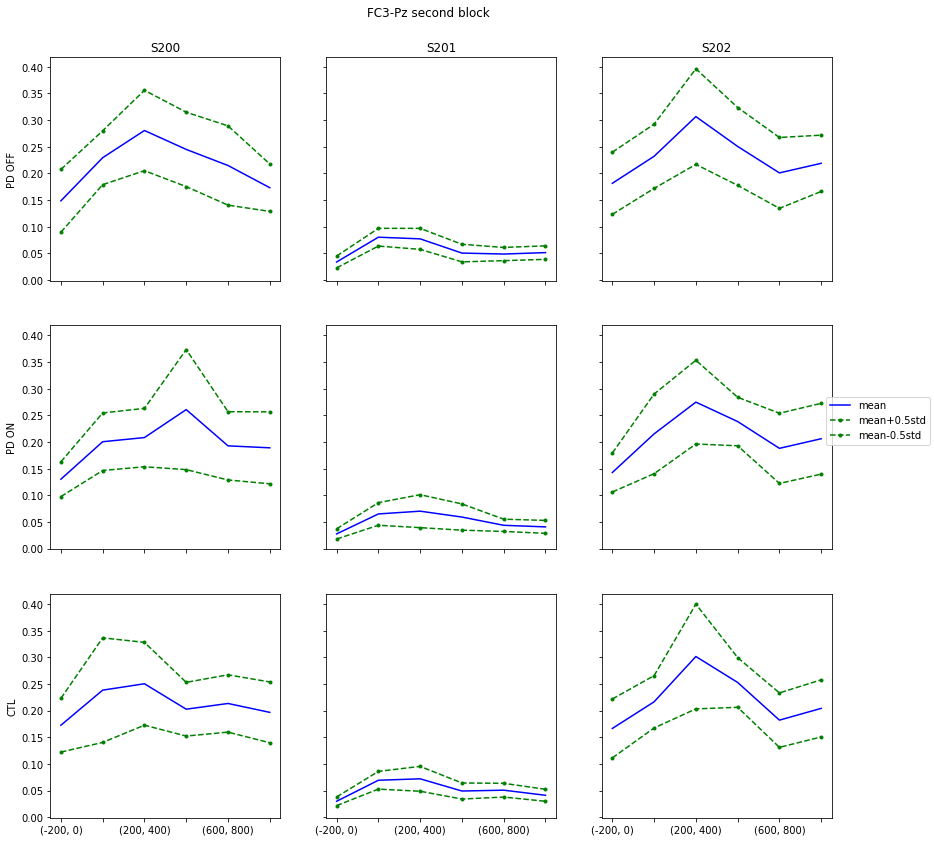

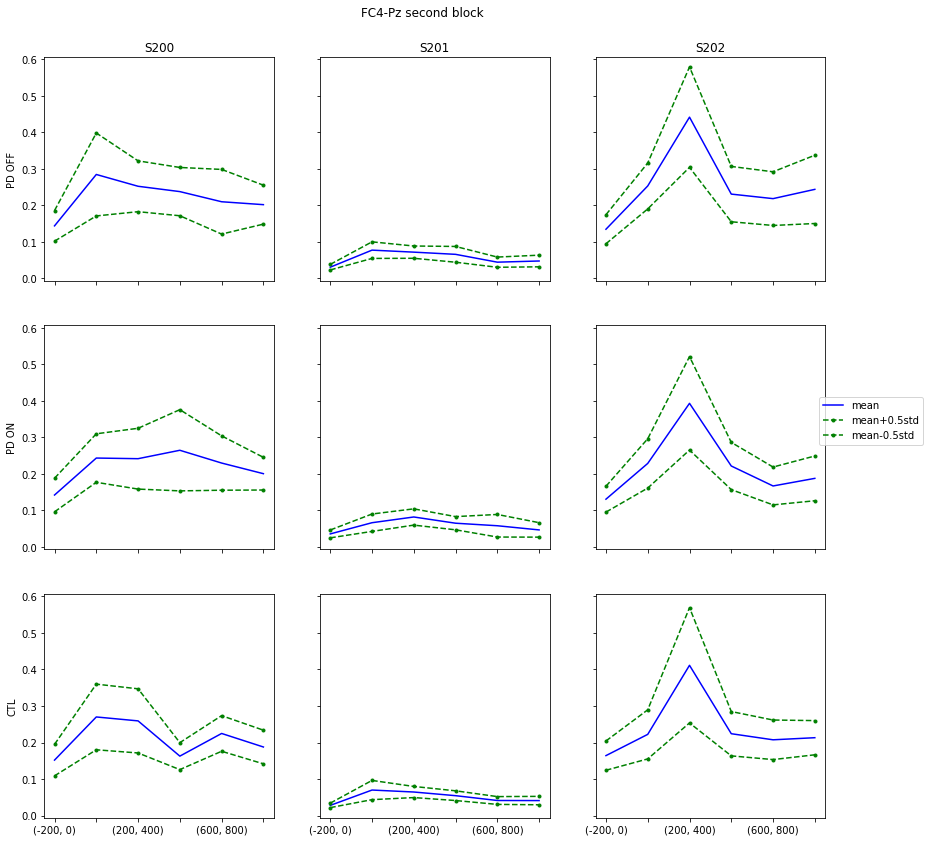

In [50]:
feature_h = 8
feature_l = 1
# ['FC3','FC4','AF3','AF4','F3','F4','Fz','Pz','Cz','FCz']
# list_index = [38, 47, 33, 61, 2, 29,1,12,23,39]

# ['Fz','Pz','Cz','FCz']
list_index = [(0,5), (1,5), (2,5), (3,5)]
for ch in list_index:
    fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(14, 14))
    for i in np.arange(3):
        for j in np.arange(3): 
            # mean_plot = np.mean(PAC_feature_time_window,axis=0)
            mvl_cross_time_feature_PAC = np.mean(mvl_cross_time[i,:,2*j+1,ch[0],ch[1],:,:,:],axis=(1,2))
            mean_plot = np.mean(mvl_cross_time_feature_PAC[:,:],axis=0)
            std_plot = np.std(mvl_cross_time_feature_PAC[:,:],axis=0)

            axs[i,j].plot(mean_plot,color='b',label='mean')
            axs[i,j].plot(mean_plot+0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean+0.5std')
            axs[i,j].plot(mean_plot-0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean-0.5std')
            axs[i,j].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))
            

    for i in np.arange(3):
        axs[i, 0].set_ylabel(f'{groups[i]}')
        axs[0, i].set_title(selected_events[i])

    handles, labels = axs[2,2].get_legend_handles_labels()
    fig.legend(handles, ['mean','mean+0.5std','mean-0.5std'], loc='right')
    plt.suptitle(f'{selected_channels[ch[0]]}-{selected_channels[ch[1]]} second block',y=0.93)
    # Path_save_fig = f'/mnt/D/Mastersharif/MasterProject/Working_with_kiani/articles/Result_on_articles/time_window_results/PAC_dynamic_ch_{channels_name[ch]}_fh{feature_h}_fl{feature_l}.png' 
    # plt.savefig(Path_save_fig) 



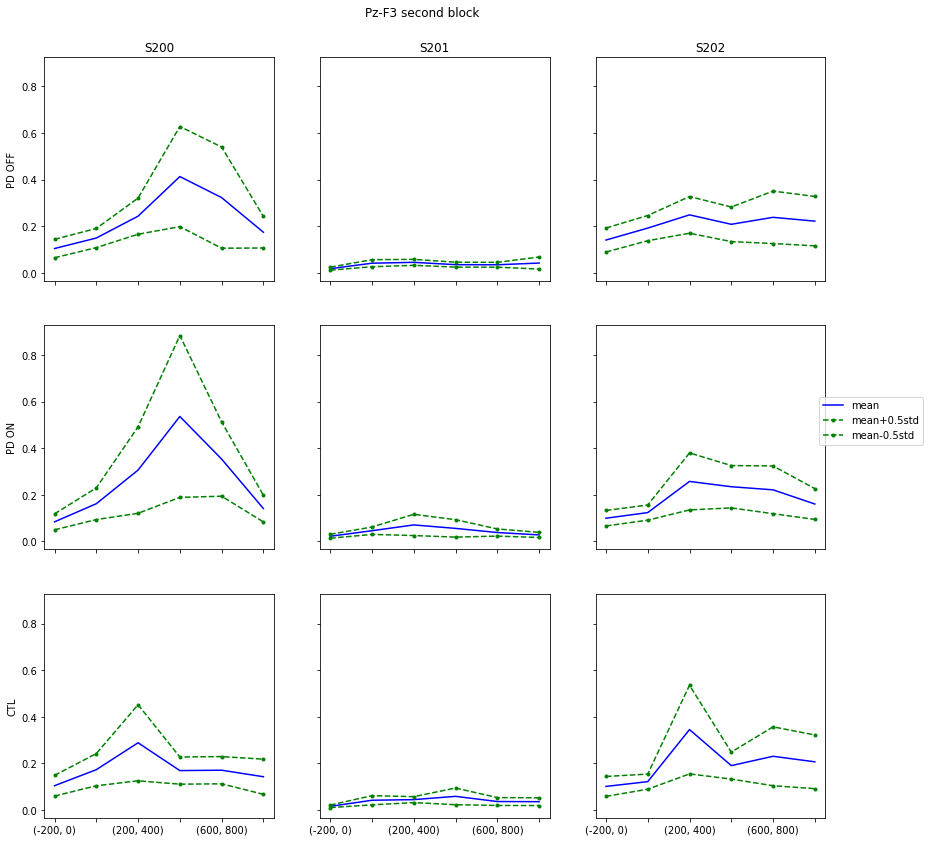

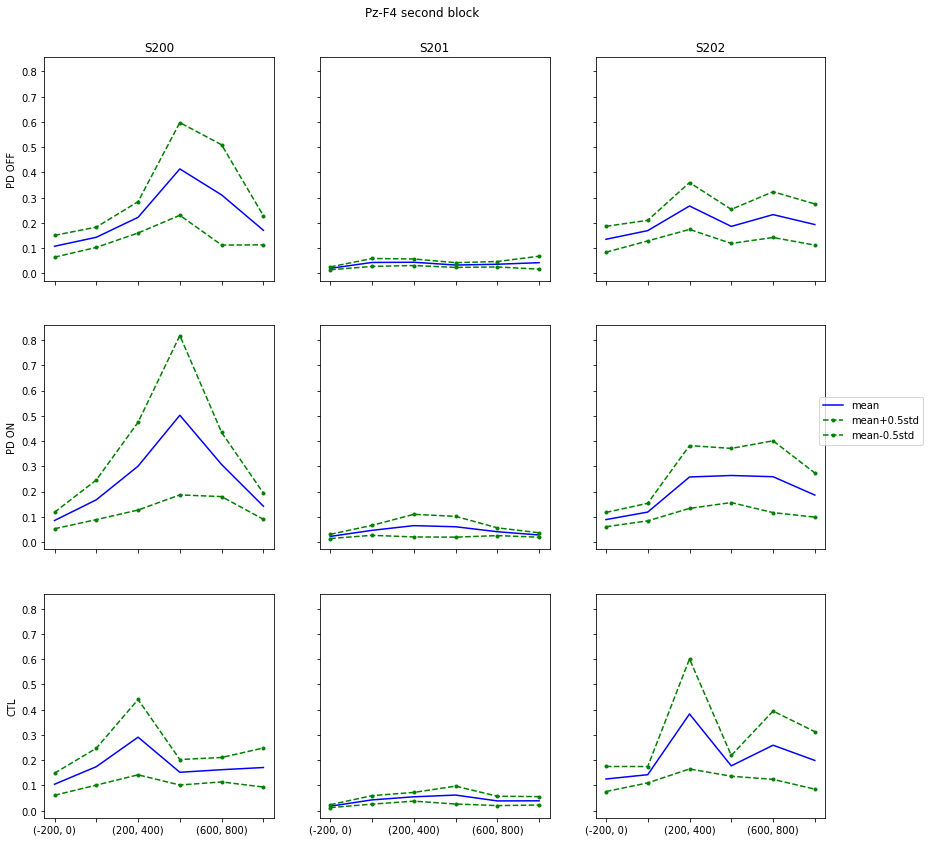

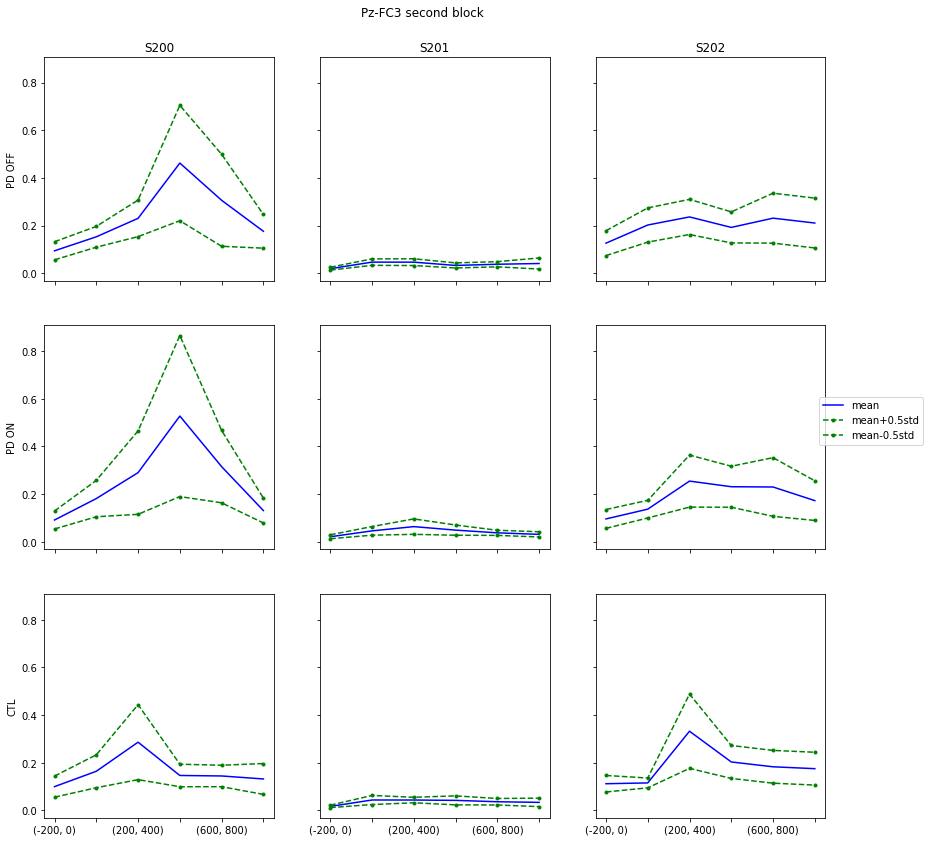

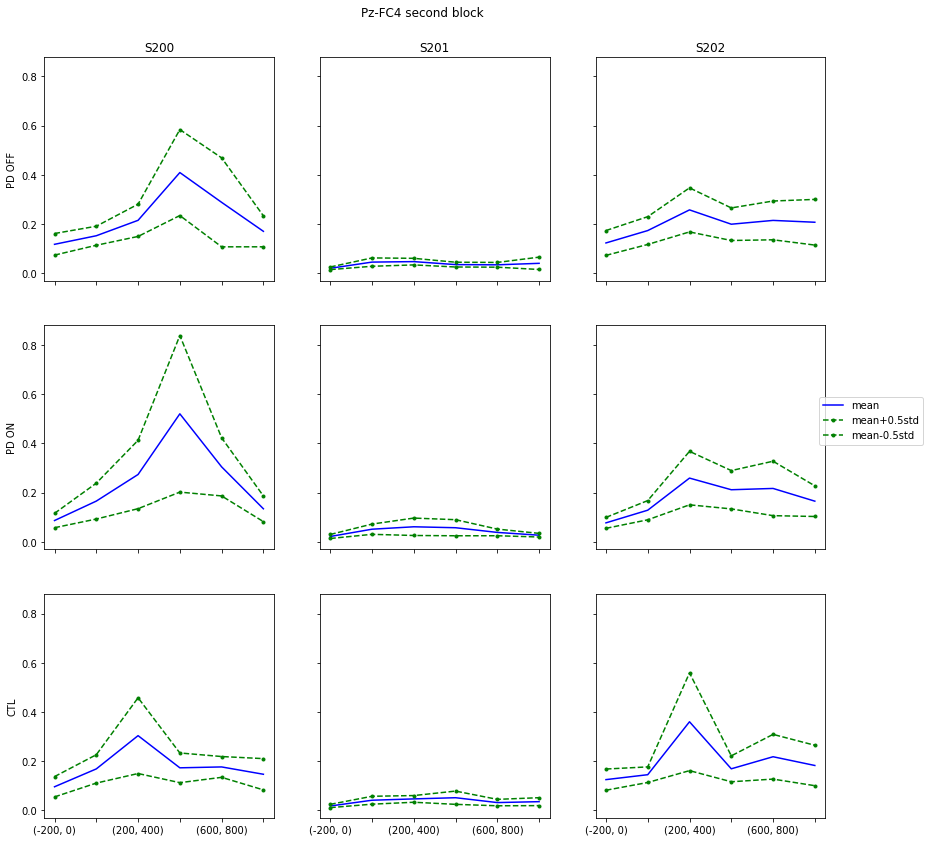

In [49]:
feature_h = 8
feature_l = 1
# ['FC3','FC4','AF3','AF4','F3','F4','Fz','Pz','Cz','FCz']
# list_index = [38, 47, 33, 61, 2, 29,1,12,23,39]

# ['Fz','Pz','Cz','FCz']
list_index = [(0,5), (1,5), (2,5), (3,5)]
for ch in list_index:
    fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(14, 14))
    for i in np.arange(3):
        for j in np.arange(3): 
            # mean_plot = np.mean(PAC_feature_time_window,axis=0)
            mvl_cross_time_feature_PAC = np.mean(mvl_cross_time[i,:,2*j+1,ch[1],ch[0],:,:,:],axis=(1,2))
            mean_plot = np.mean(mvl_cross_time_feature_PAC[:,:],axis=0)
            std_plot = np.std(mvl_cross_time_feature_PAC[:,:],axis=0)

            axs[i,j].plot(mean_plot,color='b',label='mean')
            axs[i,j].plot(mean_plot+0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean+0.5std')
            axs[i,j].plot(mean_plot-0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean-0.5std')
            axs[i,j].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))
            

    for i in np.arange(3):
        axs[i, 0].set_ylabel(f'{groups[i]}')
        axs[0, i].set_title(selected_events[i])

    handles, labels = axs[2,2].get_legend_handles_labels()
    fig.legend(handles, ['mean','mean+0.5std','mean-0.5std'], loc='right')
    plt.suptitle(f'{selected_channels[ch[1]]}-{selected_channels[ch[0]]} second block',y=0.93)
    # Path_save_fig = f'/mnt/D/Mastersharif/MasterProject/Working_with_kiani/articles/Result_on_articles/time_window_results/PAC_dynamic_ch_{channels_name[ch]}_fh{feature_h}_fl{feature_l}.png' 
    # plt.savefig(Path_save_fig) 



### Compare Second and First Block

#### Compare Fz time PAC dynamic behavior between two blocks

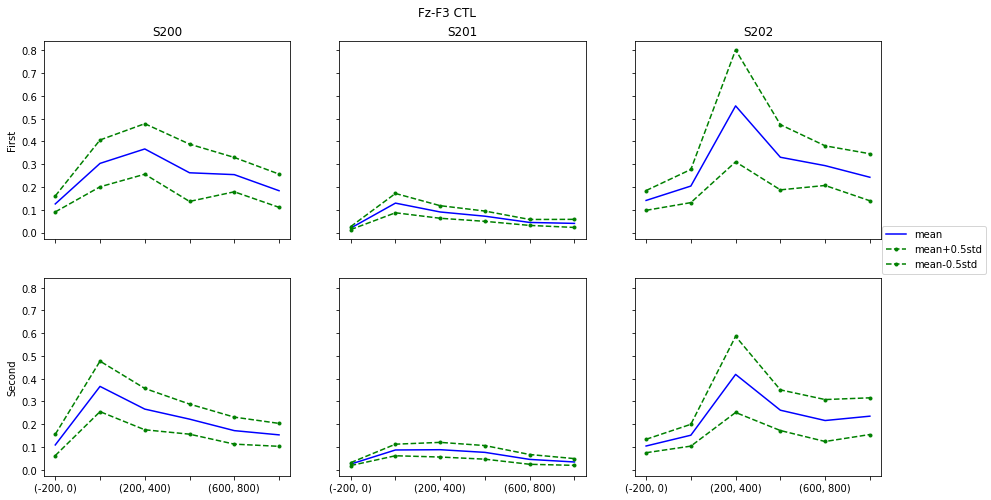

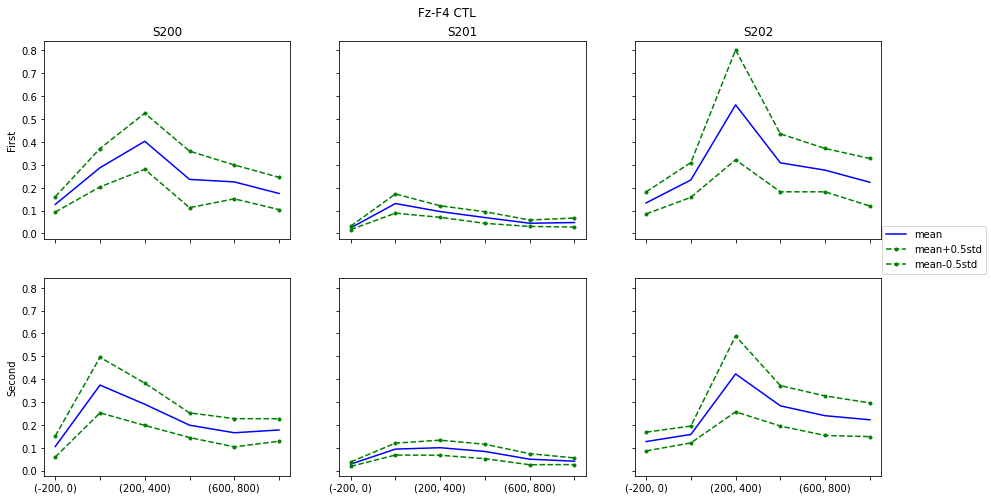

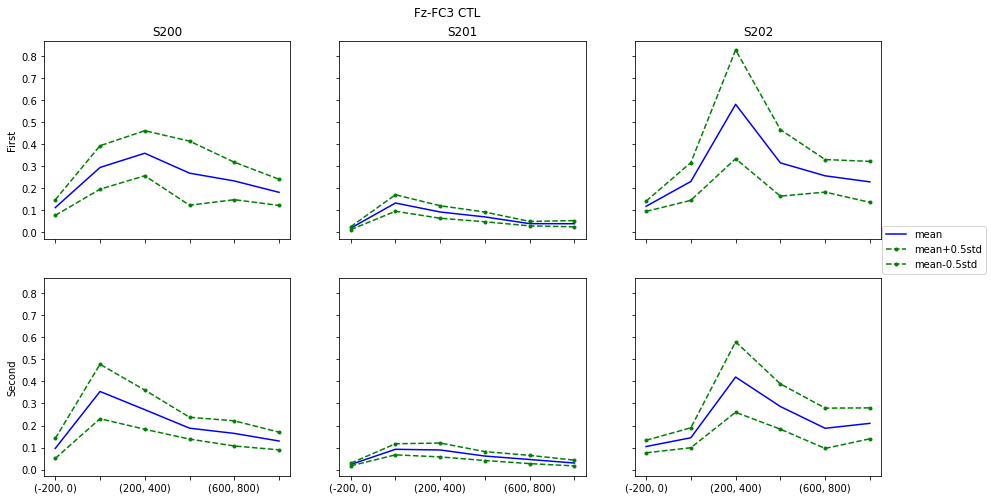

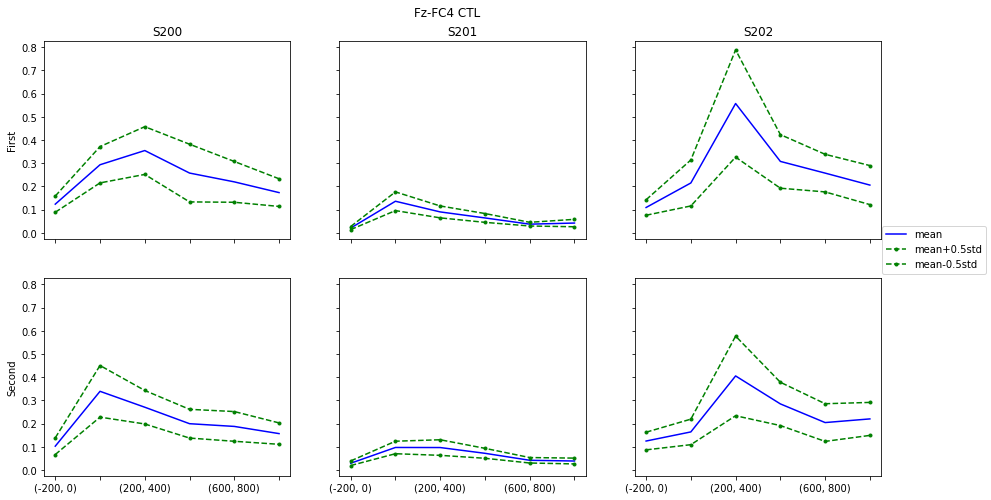

In [56]:
feature_h = 8
feature_l = 1
# ['FC3','FC4','AF3','AF4','F3','F4','Fz','Pz','Cz','FCz']
# list_index = [38, 47, 33, 61, 2, 29,1,12,23,39]
blocks = ['First','Second']
index_groups = 2

# ['Fz','Pz','Cz','FCz']
list_index = [(0,4), (1,4), (2,4), (3,4)]
for ch in list_index:
    fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 8))
    for i in np.arange(2):
        for j in np.arange(3): 
            # mean_plot = np.mean(PAC_feature_time_window,axis=0)
            mvl_cross_time_feature_PAC = np.mean(mvl_cross_time[index_groups,:,2*j+i,ch[1],ch[0],:,:,:],axis=(1,2))
            mean_plot = np.mean(mvl_cross_time_feature_PAC[:,:],axis=0)
            std_plot = np.std(mvl_cross_time_feature_PAC[:,:],axis=0)

            axs[i,j].plot(mean_plot,color='b',label='mean')
            axs[i,j].plot(mean_plot+0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean+0.5std')
            axs[i,j].plot(mean_plot-0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean-0.5std')
            axs[i,j].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))
            

    for i in np.arange(2):
        axs[i, 0].set_ylabel(f'{blocks[i]}')
    for i in np.arange(3):
        axs[0, i].set_title(selected_events[i])

    handles, labels = axs[1,2].get_legend_handles_labels()
    fig.legend(handles, ['mean','mean+0.5std','mean-0.5std'], loc='right')
    plt.suptitle(f'{selected_channels[ch[1]]}-{selected_channels[ch[0]]} {groups[index_groups]} ',y=0.94)
    # Path_save_fig = f'/mnt/D/Mastersharif/MasterProject/Working_with_kiani/articles/Result_on_articles/time_window_results/PAC_dynamic_ch_{channels_name[ch]}_fh{feature_h}_fl{feature_l}.png' 
    # plt.savefig(Path_save_fig) 



#### Compare Pz time PAC dynamic behavior between two blocks

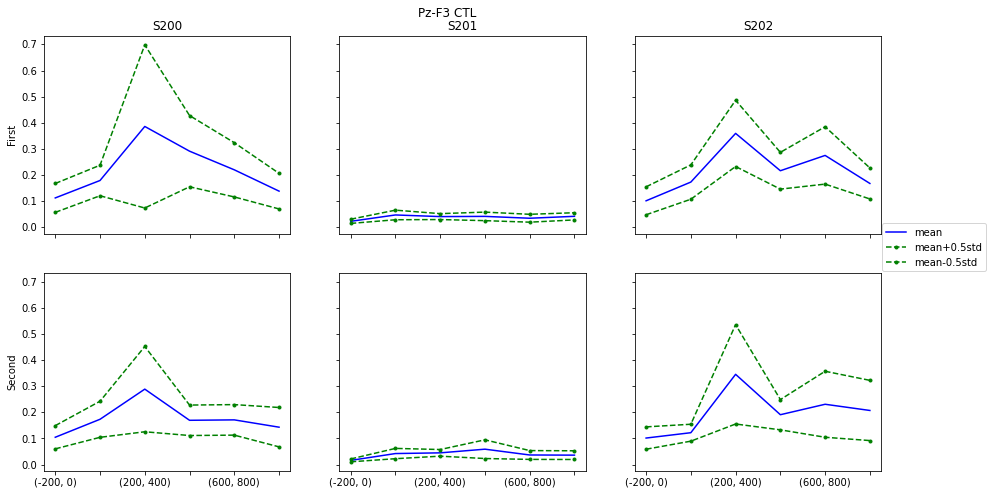

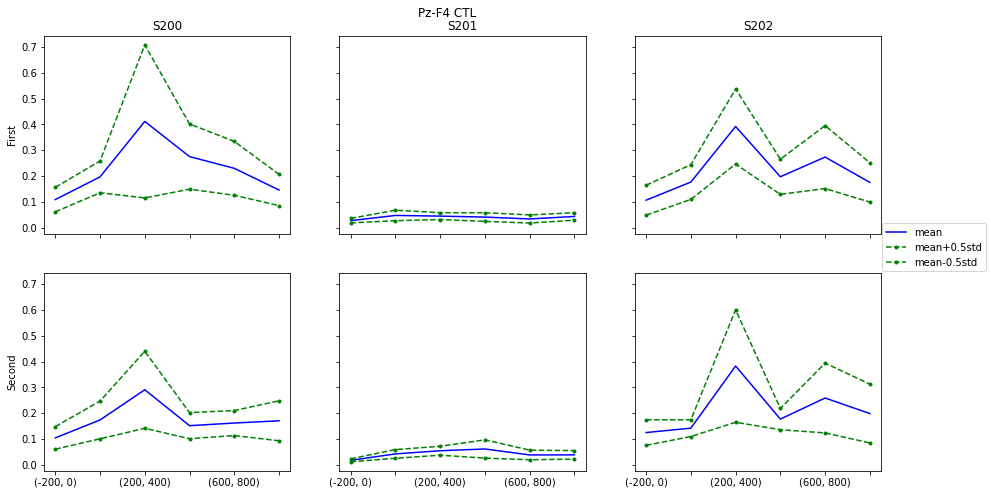

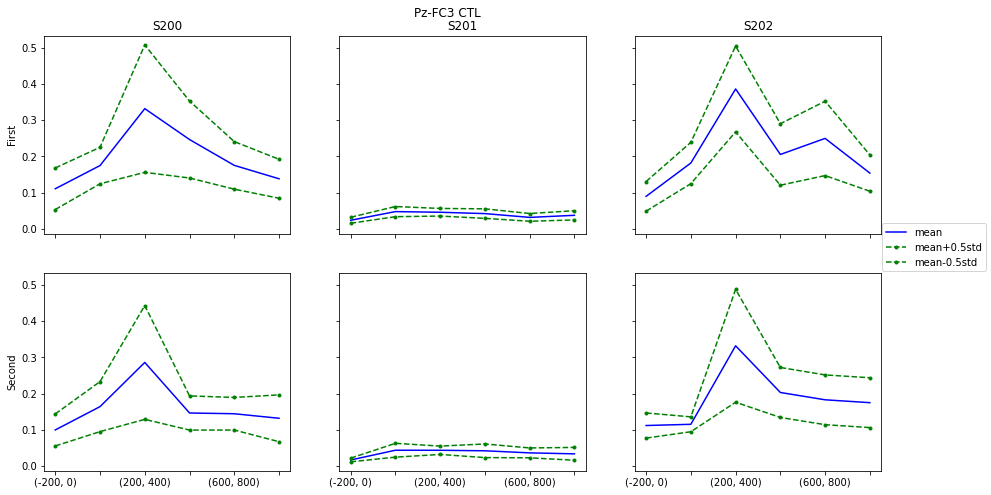

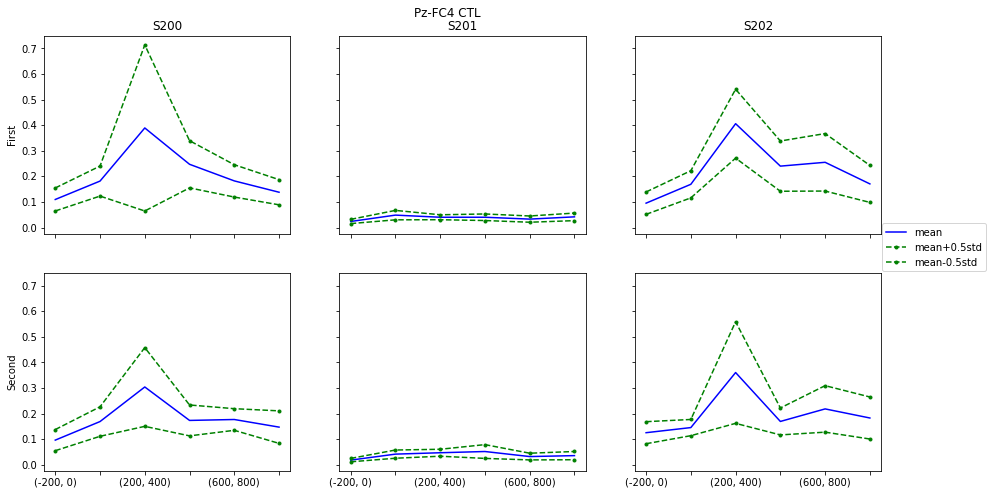

In [54]:
feature_h = 8
feature_l = 1
# ['FC3','FC5','AF3','AF5','F3','F5','Fz','Pz','Cz','FCz']
# list_index = [38, 57, 33, 61, 2, 29,1,12,23,39]
blocks = ['First','Second']
index_groups = 2

# ['Fz','Pz','Cz','FCz']
list_index = [(0,5), (1,5), (2,5), (3,5)]
for ch in list_index:
    fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 8))
    for i in np.arange(2):
        for j in np.arange(3): 
            # mean_plot = np.mean(PAC_feature_time_window,axis=0)
            mvl_cross_time_feature_PAC = np.mean(mvl_cross_time[index_groups,:,2*j+i,ch[1],ch[0],:,:,:],axis=(1,2))
            mean_plot = np.mean(mvl_cross_time_feature_PAC[:,:],axis=0)
            std_plot = np.std(mvl_cross_time_feature_PAC[:,:],axis=0)

            axs[i,j].plot(mean_plot,color='b',label='mean')
            axs[i,j].plot(mean_plot+0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean+0.5std')
            axs[i,j].plot(mean_plot-0.5*std_plot,linestyle = 'dashed',marker='.',color='g',label='mean-0.5std')
            axs[i,j].xaxis.set_major_formatter(plt.FuncFormatter(format_func_x))
            

    for i in np.arange(2):
        axs[i, 0].set_ylabel(f'{blocks[i]}')
    for i in np.arange(3):
        axs[0, i].set_title(selected_events[i])

    handles, labels = axs[1,2].get_legend_handles_labels()
    fig.legend(handles, ['mean','mean+0.5std','mean-0.5std'], loc='right')
    plt.suptitle(f'{selected_channels[ch[1]]}-{selected_channels[ch[0]]} {groups[index_groups]} ',y=0.93)
    # Path_save_fig = f'/mnt/D/Mastersharif/MasterProject/Working_with_kiani/articles/Result_on_articles/time_window_results/PAC_dynamic_ch_{channels_name[ch]}_fh{feature_h}_fl{feature_l}.png' 
    # plt.savefig(Path_save_fig) 

